In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
def scatter_plt(
    data, x_var, y_var, x_log=True, n_sample=None, smooth=False, frac=0.1, seed=123):
    """
    Scatter plot (x with log10)
    Param:
        - n_sample: size of sample or None
        - lowess: plot smooth curve or not
        - frac: lowess frac
    """
    if n_sample:
        data = data.sample(n_sample, random_state=seed)
    data_sw = data[data['sw'] == 1]
    data_resto = data[data['sw'] == 0]
    fig, ax = plt.subplots()
    if x_log:
        ax.set_xscale('log')
        ax.set_xlim(left=10, right=10**8)
    plt.scatter(x_var, y_var, linewidth=0, c='darkolivegreen', s=4, data=data_resto)
    plt.scatter(x_var, y_var, linewidth=0, c='firebrick', s=4, data=data_sw)
    if smooth:
        x_data = data[x_var]
        if x_log:
            x_data = np.log10(data[x_var])
        smooth_data = lowess(data[y_var], x_data, frac=frac)
        x_smooth = smooth_data[:,0]
        if x_log:
            x_smooth = 10**smooth_data[:,0]
        line = ax.plot(
            x_smooth, smooth_data[:,1], color='black', lw=1.0, ls='--')
    ax.axhline(0, ls='--', color='gray', linewidth=0.5)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    return fig, ax


def boxplots_plt(data, x_var, y_var, bins):
    """
    Cut x_var in bins and make one boxplot per bin
    """
    freq_bins = pd.cut(np.log10(data[x_var]), bins=bins)
    nobs = freq_bins.value_counts().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]
    fig, ax = plt.subplots()
    ax = sns.boxplot(x=freq_bins, y=data[y_var], showfliers=False)
    ax.axhline(0, ls='--', color='black', linewidth=0.5)
    labels_ypos = ax.get_ylim()[1]
    for i in range(len(nobs)):
        ax.text(
            i, labels_ypos, nobs[i], horizontalalignment='center', size='small'
            , color='black', weight='semibold')
    return fig, ax


def scatter_color_plt(data, x_var, y_var, color_var, n_sample=None, seed=123):
    if n_sample:
        data = data.sample(n_sample, random_state=seed)
    fig, ax = plt.subplots()
    scatter = ax.scatter(
        x_var, y_var, c=color_var, cmap='viridis'
        ,s=1, norm=matplotlib.colors.LogNorm(), data=data)
    cbar = plt.colorbar(scatter, ax=ax)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    cbar.ax.set_title('freq.')
    return fig, ax


def add_ranking_col(df, colname):
    """
    Add column to df with 'rank_' prefix with the rank of the absolute value
    """
    col_abs = df[colname].abs()
    newname = 'rank_'+colname+'_abs'
    df[newname] = stats.rankdata(col_abs, "average")/len(col_abs)
    return df

## Data

In [3]:
dat = pd.read_csv("results/csv/biasbyword_full-C3_HE-SHE.csv")

## Vectores W2V

### Similitud (w,He)

Coseno(w,he) (dot product normalizado)

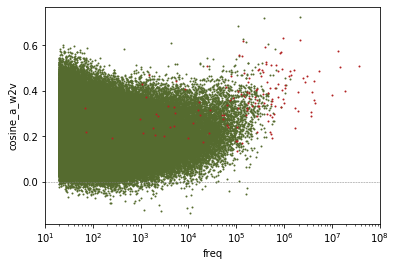

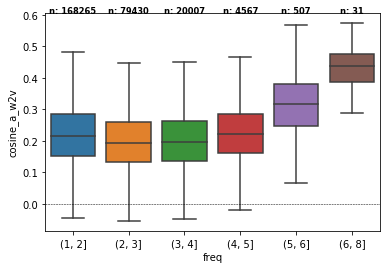

In [4]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='cosine_a_w2v')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='cosine_a_w2v', bins=[1,2,3,4,5,6,8])

### Similitud (w,She)

Coseno(w,she) (dot product normalizado)

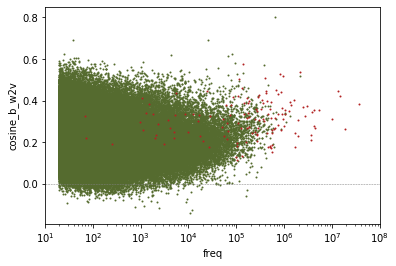

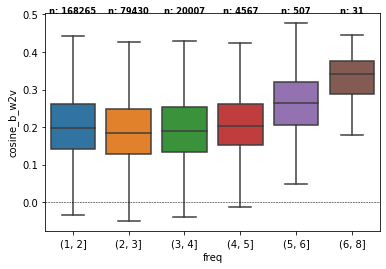

In [5]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='cosine_b_w2v')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='cosine_b_w2v', bins=[1,2,3,4,5,6,8])

### Norma L2

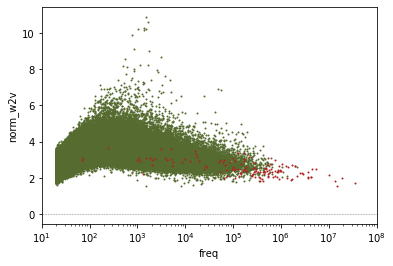

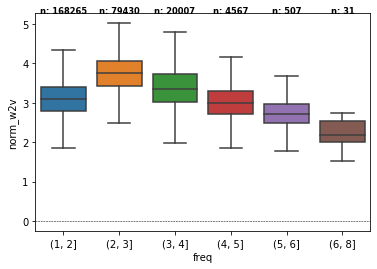

In [6]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='norm_w2v')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='norm_w2v', bins=[1,2,3,4,5,6,8])

### Sesgo

**Medido con diferencia de coseno**

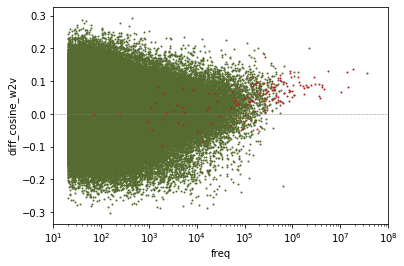

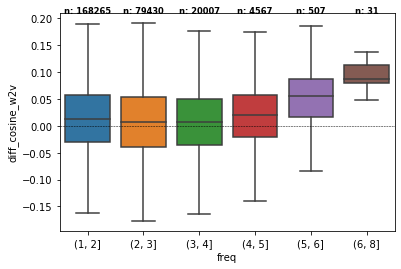

In [7]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='diff_cosine_w2v')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='diff_cosine_w2v', bins=[1,2,3,4,5,6,8])

In [8]:
dat.sort_values("diff_cosine_w2v", ascending=False).head(20)\
    [['word','freq','cosine_a_w2v','cosine_b_w2v','diff_cosine_w2v']]

,word,freq,cosine_a_w2v,cosine_b_w2v,diff_cosine_w2v
41262,matthäus,451,0.362681,0.069398,0.293283
181559,zenden,40,0.304746,0.016685,0.288061
163354,bican,47,0.498489,0.213192,0.285297
173799,trialist,43,0.537447,0.259170,0.278278
60648,trautmann,245,0.467578,0.190220,0.277358
140379,boniek,61,0.405344,0.132192,0.273152
208535,hoeneß,31,0.412866,0.139846,0.273020
46234,hašek,379,0.431749,0.164485,0.267264
210027,sauzée,31,0.571411,0.304710,0.266702
176921,debreceni,41,0.279085,0.015060,0.264025


Las palabras con mayor sesgo masculino son nombres propios de varones, en general relacionados con el deporte.

## Vectores GloVe

### Similitud (w,He)

Coseno(w,he) (dot product normalizado)

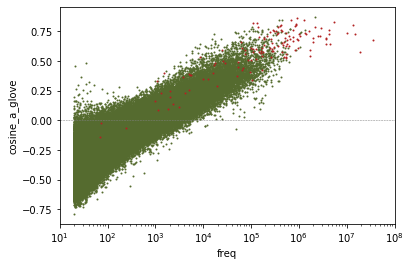

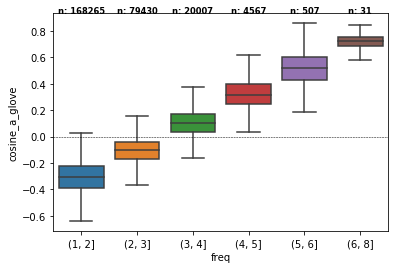

In [9]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='cosine_a_glove')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='cosine_a_glove', bins=[1,2,3,4,5,6,8])

### Similitud (w,She)

Coseno(w,she) (dot product normalizado)

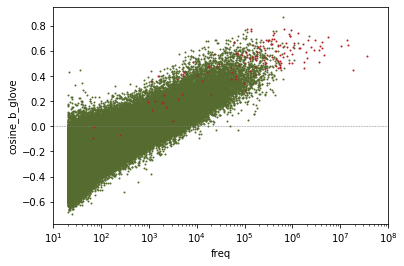

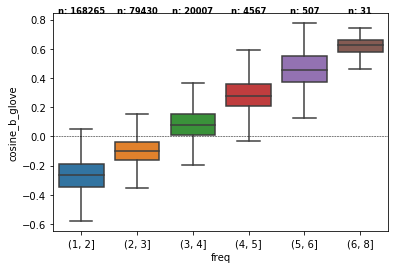

In [10]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='cosine_b_glove')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='cosine_b_glove', bins=[1,2,3,4,5,6,8])

### Norma L2

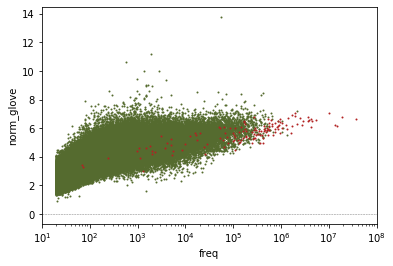

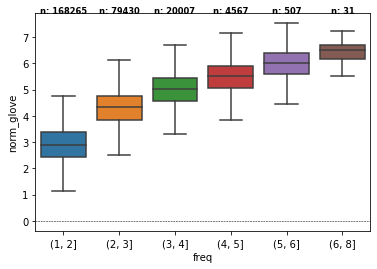

In [11]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='norm_glove')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='norm_glove', bins=[1,2,3,4,5,6,8])

### Sesgo

**Medido con diferencia de coseno**

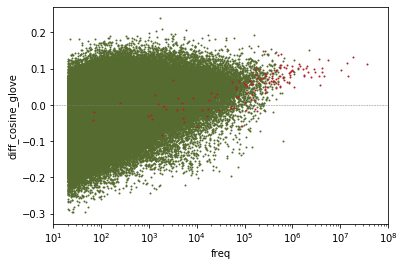

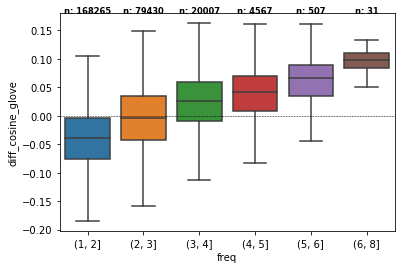

In [12]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='diff_cosine_glove')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='diff_cosine_glove', bins=[1,2,3,4,5,6,8])

In [13]:
dat.sort_values("diff_cosine_glove", ascending=False).head(20)\
    [['word','freq','cosine_a_glove','cosine_b_glove','diff_cosine_glove']]

,word,freq,cosine_a_glove,cosine_b_glove,diff_cosine_glove
18192,programmable,1658,0.013707,-0.225850,0.239556
16621,diode,1903,0.043993,-0.166868,0.210861
7443,ecclesiastical,6068,0.265438,0.058901,0.206537
20305,calculators,1395,0.064711,-0.139693,0.204404
24959,umpires,1011,0.071609,-0.126716,0.198325
12559,transistor,2901,0.054227,-0.142362,0.196589
10955,barons,3537,0.195610,0.001295,0.194315
3242,logic,17429,0.199810,0.005787,0.194023
304,led,160312,0.659036,0.466238,0.192798
81179,radovan,153,-0.150119,-0.341604,0.191485


Entre las palabras con mayor sesgo masculino priman las palabras relacionadas con la ciencia, electrónica, deportes.

## Vectores PPMI

Se usan los vectores de la matriz de PPMI con todas las dimensiones (es decir, de las palabras de frec. por lo menos igual a 20)

In [14]:
print(f"La dimensión de los vectores es igual a {dat.idx.max()}")

La dimensión de los vectores es igual a 272809


### Similitud (w,He)

Coseno(w,he) (dot product normalizado)

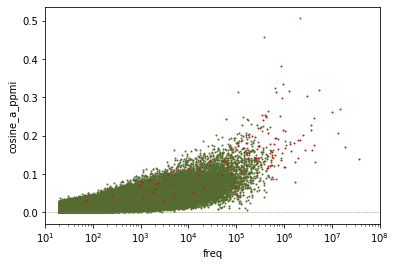

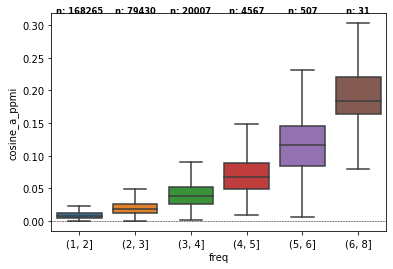

In [15]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='cosine_a_ppmi')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='cosine_a_ppmi', bins=[1,2,3,4,5,6,8])

### Similitud (w,She)

Coseno(w,she) (dot product normalizado)

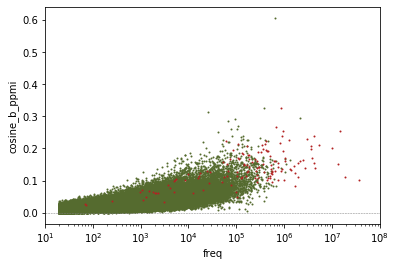

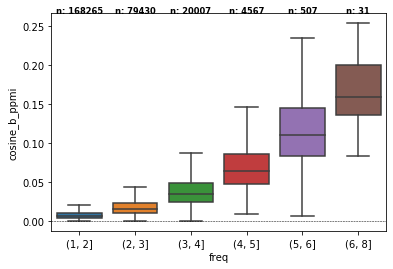

In [16]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='cosine_b_ppmi')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='cosine_b_ppmi', bins=[1,2,3,4,5,6,8])

### Norma L2

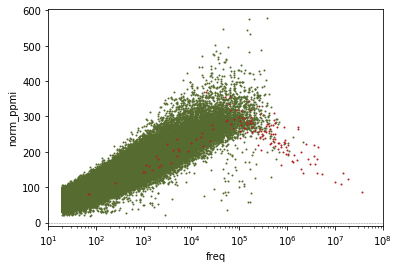

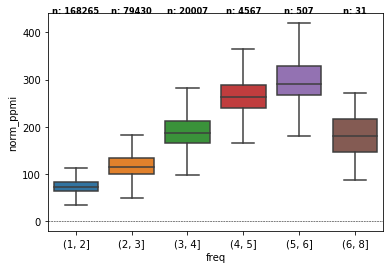

In [17]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='norm_ppmi')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='norm_ppmi', bins=[1,2,3,4,5,6,8])

### Sesgo

**Medido con diferencia de coseno**

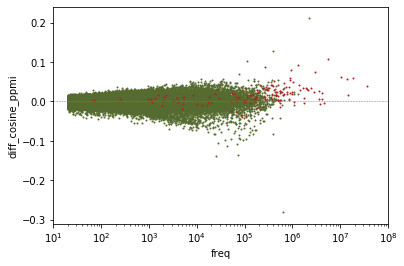

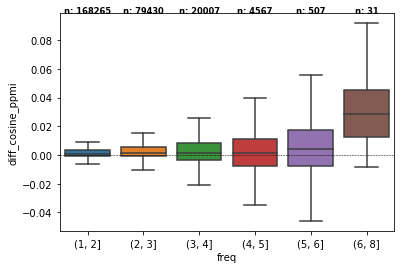

In [18]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='diff_cosine_ppmi')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='diff_cosine_ppmi', bins=[1,2,3,4,5,6,8])

In [19]:
dat.sort_values("diff_cosine_ppmi", ascending=False).head(20)\
    [['word','freq','cosine_a_ppmi','cosine_b_ppmi','diff_cosine_ppmi']]

,word,freq,cosine_a_ppmi,cosine_b_ppmi,diff_cosine_ppmi
15,his,2170378,0.506137,0.294929,0.211209
94,him,384294,0.455953,0.326726,0.129226
5,was,5400678,0.318175,0.209257,0.108918
486,himself,110352,0.313076,0.209105,0.103970
25,had,1280435,0.317165,0.225341,0.091824
144,against,272169,0.226786,0.138124,0.088662
33,but,934794,0.334549,0.254529,0.080020
12,that,2949351,0.302965,0.228206,0.074759
739,appointed,76248,0.148404,0.078994,0.069410
4,to,10195426,0.261318,0.200320,0.060998


In [20]:
dat.sort_values("diff_cosine_ppmi", ascending=True).head(20)\
    [['word','freq','cosine_a_ppmi','cosine_b_ppmi','diff_cosine_ppmi']]

,word,freq,cosine_a_ppmi,cosine_b_ppmi,diff_cosine_ppmi
47,her,647413,0.324570,0.605916,-0.281345
2349,herself,25139,0.172253,0.311669,-0.139416
792,actress,71625,0.083717,0.220361,-0.136644
1414,girl,41893,0.137513,0.250814,-0.113301
836,woman,67647,0.178534,0.285671,-0.107138
2205,starred,27065,0.082690,0.187765,-0.105076
1530,starring,39094,0.073376,0.171954,-0.098577
582,mother,93272,0.195049,0.292863,-0.097814
682,husband,80106,0.143390,0.239752,-0.096361
1141,sister,51586,0.130075,0.225906,-0.095831


## Correlaciones

Correlaciones entre cosenos (w,he)

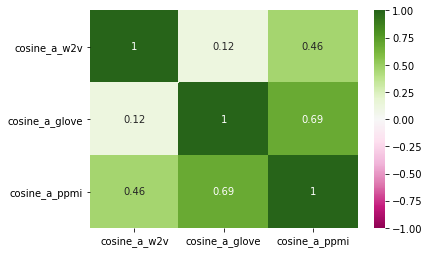

In [21]:
cols = ['cosine_a_w2v','cosine_a_glove','cosine_a_ppmi']
sns.heatmap(
    dat[cols].corr("spearman"), vmin=-1, vmax=1, cmap="PiYG", annot=True)

Correlaciones entre cosenos (w,she)

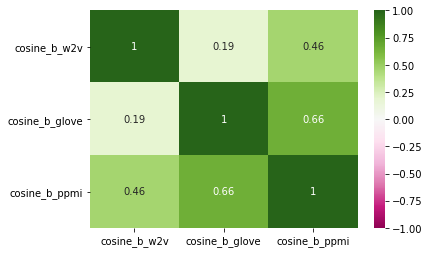

In [22]:
cols = ['cosine_b_w2v','cosine_b_glove','cosine_b_ppmi']
sns.heatmap(
    dat[cols].corr("spearman"), vmin=-1, vmax=1, cmap="PiYG", annot=True)

Correlaciones entre métricas de sesgo

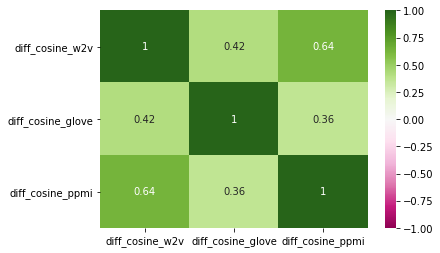

In [23]:
cols = ['diff_cosine_w2v','diff_cosine_glove','diff_cosine_ppmi']
sns.heatmap(
    dat[cols].corr("spearman"), vmin=-1, vmax=1, cmap="PiYG", annot=True)

Las diferencias de cosenos W2V y PPMI tienen una correlación relativamente alta

## Regresión

Si las métricas de sesgo basadas en WE captan otras dimensiones además de las coocurrencias de primer y segundo orden, entonces en un modelo de regresión

$$
sesgo_{we} = \alpha_{0} + \alpha_{1}DPPMI + \alpha_{2}DCOSPPMI
$$

donde 

$$
DPPMI_{w} = PPMI(w,he) - PPMI(w,she)  
$$

$$
DCOSPPMI_{w} = cos(vecppmi_{w},vecppmi_{he}) - cos(vecppmi_{w},vecppmi_{she})
$$

la variabilidad no captada por los regresores debería ser bastante alta 

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
def modelo(df, y, x):
    """
    x: lista con nombres de covariables
    y: nombre de target
    """
    form = y + " ~ " + " + ".join(x)
    mod = ols(formula=form, data=df)
    res = mod.fit()
    print("Coeficientes\n", res.conf_int(), "\nR2\n", res.rsquared)

### En w2v

In [27]:
modelo(dat, "diff_cosine_w2v", ["dppmi","diff_cosine_ppmi"])

Coeficientes
                          0         1
Intercept         0.002554  0.002983
dppmi             0.017091  0.018049
diff_cosine_ppmi  5.712234  5.780679 
R2
 0.360116852847852


In [28]:
modelo(
    dat, "diff_cosine_w2v"
    ,["dppmi","diff_cosine_ppmi","np.log(freq)","np.power(np.log(freq),2)"]) 

Coeficientes
                                   0         1
Intercept                  0.054072  0.057596
dppmi                      0.016516  0.017467
diff_cosine_ppmi           5.783482  5.851559
np.log(freq)              -0.018915 -0.017619
np.power(np.log(freq), 2)  0.001261  0.001369 
R2
 0.36961352384568325


Usando diferencia de cosenos, el R2 es de 36% y no crece significativamente una vez que se considera la frecuencia

Esto es evidencia de que los patrones observados en los sesgos se explican más por las coocurrencias de segundo orden (diferencia de cosenos de vectores PPMI) que por las frecuencias de las palabras.

### En GloVe

In [30]:
modelo(dat, "diff_cosine_glove", ["dppmi","diff_cosine_ppmi"])

Coeficientes
                          0         1
Intercept        -0.028346 -0.027913
dppmi             0.012759  0.013725
diff_cosine_ppmi  3.154082  3.223075 
R2
 0.15579552295388255


In [31]:
modelo(
    dat, "diff_cosine_glove"
    ,["dppmi","diff_cosine_ppmi","np.log(freq)","np.power(np.log(freq),2)"]) 

Coeficientes
                                   0         1
Intercept                 -0.135377 -0.132135
dppmi                      0.014108  0.014984
diff_cosine_ppmi           2.937646  3.000258
np.log(freq)               0.028767  0.029959
np.power(np.log(freq), 2) -0.001304 -0.001204 
R2
 0.30762549066526257


En GloVe las coocurrencias de primer y segundo orden no explican tanto la variabilidad en el sesgo como en w2v (R2 = 0.15)

La frecuencia de las palabras sí aumenta significativamente la variabilidad del sesgo explicada, a diferencia de w2v -- sin embargo, el residuo sigue siendo "alto" 

In [48]:
X = np.random.uniform(10, 20, size=(100,2))
Z = np.random.uniform(0, 1, size=(100,2))

dx = X[:,0] - X[:,1]
dz = Z[:,0] - Z[:,1]

abs(dx).mean(), abs(dz).mean()

(3.2797822849717475, 0.3246424077186612)